In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/tattoo_studio_clean.csv")
df.head()

,Age,Gender,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Customer_Satisfaction
0,46,Female,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,3
1,32,Male,Saturday,Walk-in,Small,Custom,Artist C,1,2
2,25,Male,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,1
3,38,Female,Friday,Pre-booked,Medium,Script,Artist D,4,4
4,36,Male,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,1


In [4]:
def categorizar_horas(horas):
    if horas <= 2:
        return "Corto"
    elif horas <= 5:
        return "Medio"
    else:
        return "Largo"

df["Session_Hours_Cat"] = df["Session_Hours"].apply(categorizar_horas)

In [5]:
y = df["Session_Hours_Cat"]
X = df.drop(columns=["Session_Hours", "Session_Hours_Cat"])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
categoricas = X.select_dtypes(include="object").columns
numericas = X.select_dtypes(include=["int64","float64"]).columns

preprocesamiento = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categoricas),
    ("num", SimpleImputer(strategy="mean"), numericas)
])

In [8]:
from sklearn.ensemble import RandomForestClassifier

modelo = Pipeline([
    ("prep", preprocesamiento),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

modelo.fit(X_train, y_train)

,steps,"[('prep', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
y_pred = modelo.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=["Corto", "Medio", "Largo"])


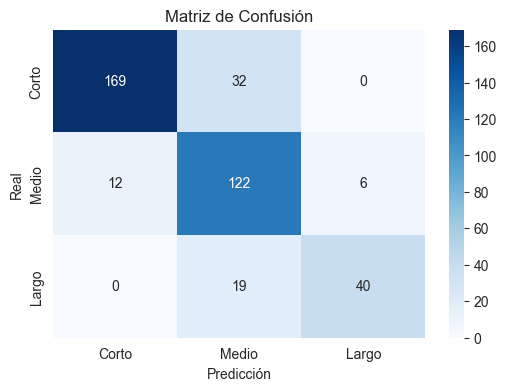

In [13]:
# 1. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Corto", "Medio", "Largo"])

# 2. Grafica de la matriz
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Corto", "Medio", "Largo"],
    yticklabels=["Corto", "Medio", "Largo"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
